# Trabalho AM 2022.2 Francisco

## Grupo:
  - Danilo Vaz (dvma)
  - Humberto Lopes (hlfs2)
  - Marcelo Valois (mmv4)
  - Matheus Albuquerque (mvca)

# Importando Bibliotecas

Carregando as bibliotecas utilizadas para análise e desenvolvimento

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import warnings

In [ ]:
warnings.filterwarnings("ignore")

# Leitura das Bases e Análises Descritivas

O data set é composto por 10 variáveis que representam o padrão de 4 linhas consecutivas escritas por um de doze amanuenses da Bíblia e 1 variável *Class* que indica o amanuense responsável.

Sendo as variáveis:

* **F1** - Distância intercolunar
* **F2** - Margem superior
* **F3** - Margem inferior
* **F4** - *Exploitation* (Medida de quanto a coluna está cheia de tinta)
* **F5** - Número da linha (Quantidade de caracteres na linha)
* **F6** - Taxa modular (Razão entre a largura e altura da letra do amanuense)
* **F7** - Espaçamento interlinear (Distância em pixel entre o centro de duas linhas consecutivas)
* **F8** - Peso (Medida de quanto a linha está cheia de tinta)
* **F9** - Número de pico (Número de pixels que ultrapassaram a média de tinta por pixel)
* **F10** - Taxa modular/espaçamento interlinear
* **Class** - O amanuense responsável pelas 4 linhas agrupadas (Doze no total: A, B, C, D, E, F, G, H, I, W, X, Y)



## Base de Treino

* Carregando a Base de Treino

In [ ]:
df_tr = pd.read_csv("avila-tr.txt", header=None, names=['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                                                        'F7', 'F8', 'F9', 'F10', 'CLASS'])


* Verificando a Distribuição das Classes na Base de Treino

In [ ]:
df_tr.iloc[:, -1].value_counts()

A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: CLASS, dtype: int64

* Descrevendo as Variáveis Numéricas

In [ ]:
df_tr.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


* Verificando se os tipos das variáveis estão apropriados

In [ ]:
df_tr.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10      float64
CLASS     object
dtype: object

## Base de Teste

* Carregando a Base de Teste

In [ ]:
df_ts = pd.read_csv("avila-ts.txt", header=None, names=['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                                                        'F7', 'F8', 'F9', 'F10', 'CLASS'])


* Verificando Distribuição das Classes na Base de Teste

In [ ]:
df_ts.iloc[:, -1].value_counts()

A    4286
F    1962
E    1095
I     832
X     522
H     520
G     447
D     353
Y     267
C     103
W      45
B       5
Name: CLASS, dtype: int64

* Descrevendo as Variáveis Numéricas

In [ ]:
df_ts.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,0.002616,-0.006365,-0.008886,0.002350,-0.010259,-0.008691,-0.000678
std,1.008551,0.955257,0.992430,0.991443,1.007876,1.000360,0.966827,0.996431,1.001240,0.992928
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090167,-4.737863,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,4.580832,3.213413,11.911338


* Verificando se os tipos das variáveis estão apropriados

In [ ]:
df_ts.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10      float64
CLASS     object
dtype: object

* Separando as variáveis dependentes das independentes no conjunto de teste

In [ ]:
x_test = df_ts.iloc[:, :-1]
y_test = df_ts.iloc[:, -1]

# Visualizando os Dados

* Utilizamos pair plot para analisar e visualizar a influência que as variáveis têm nos alvos tomadas dois a dois.



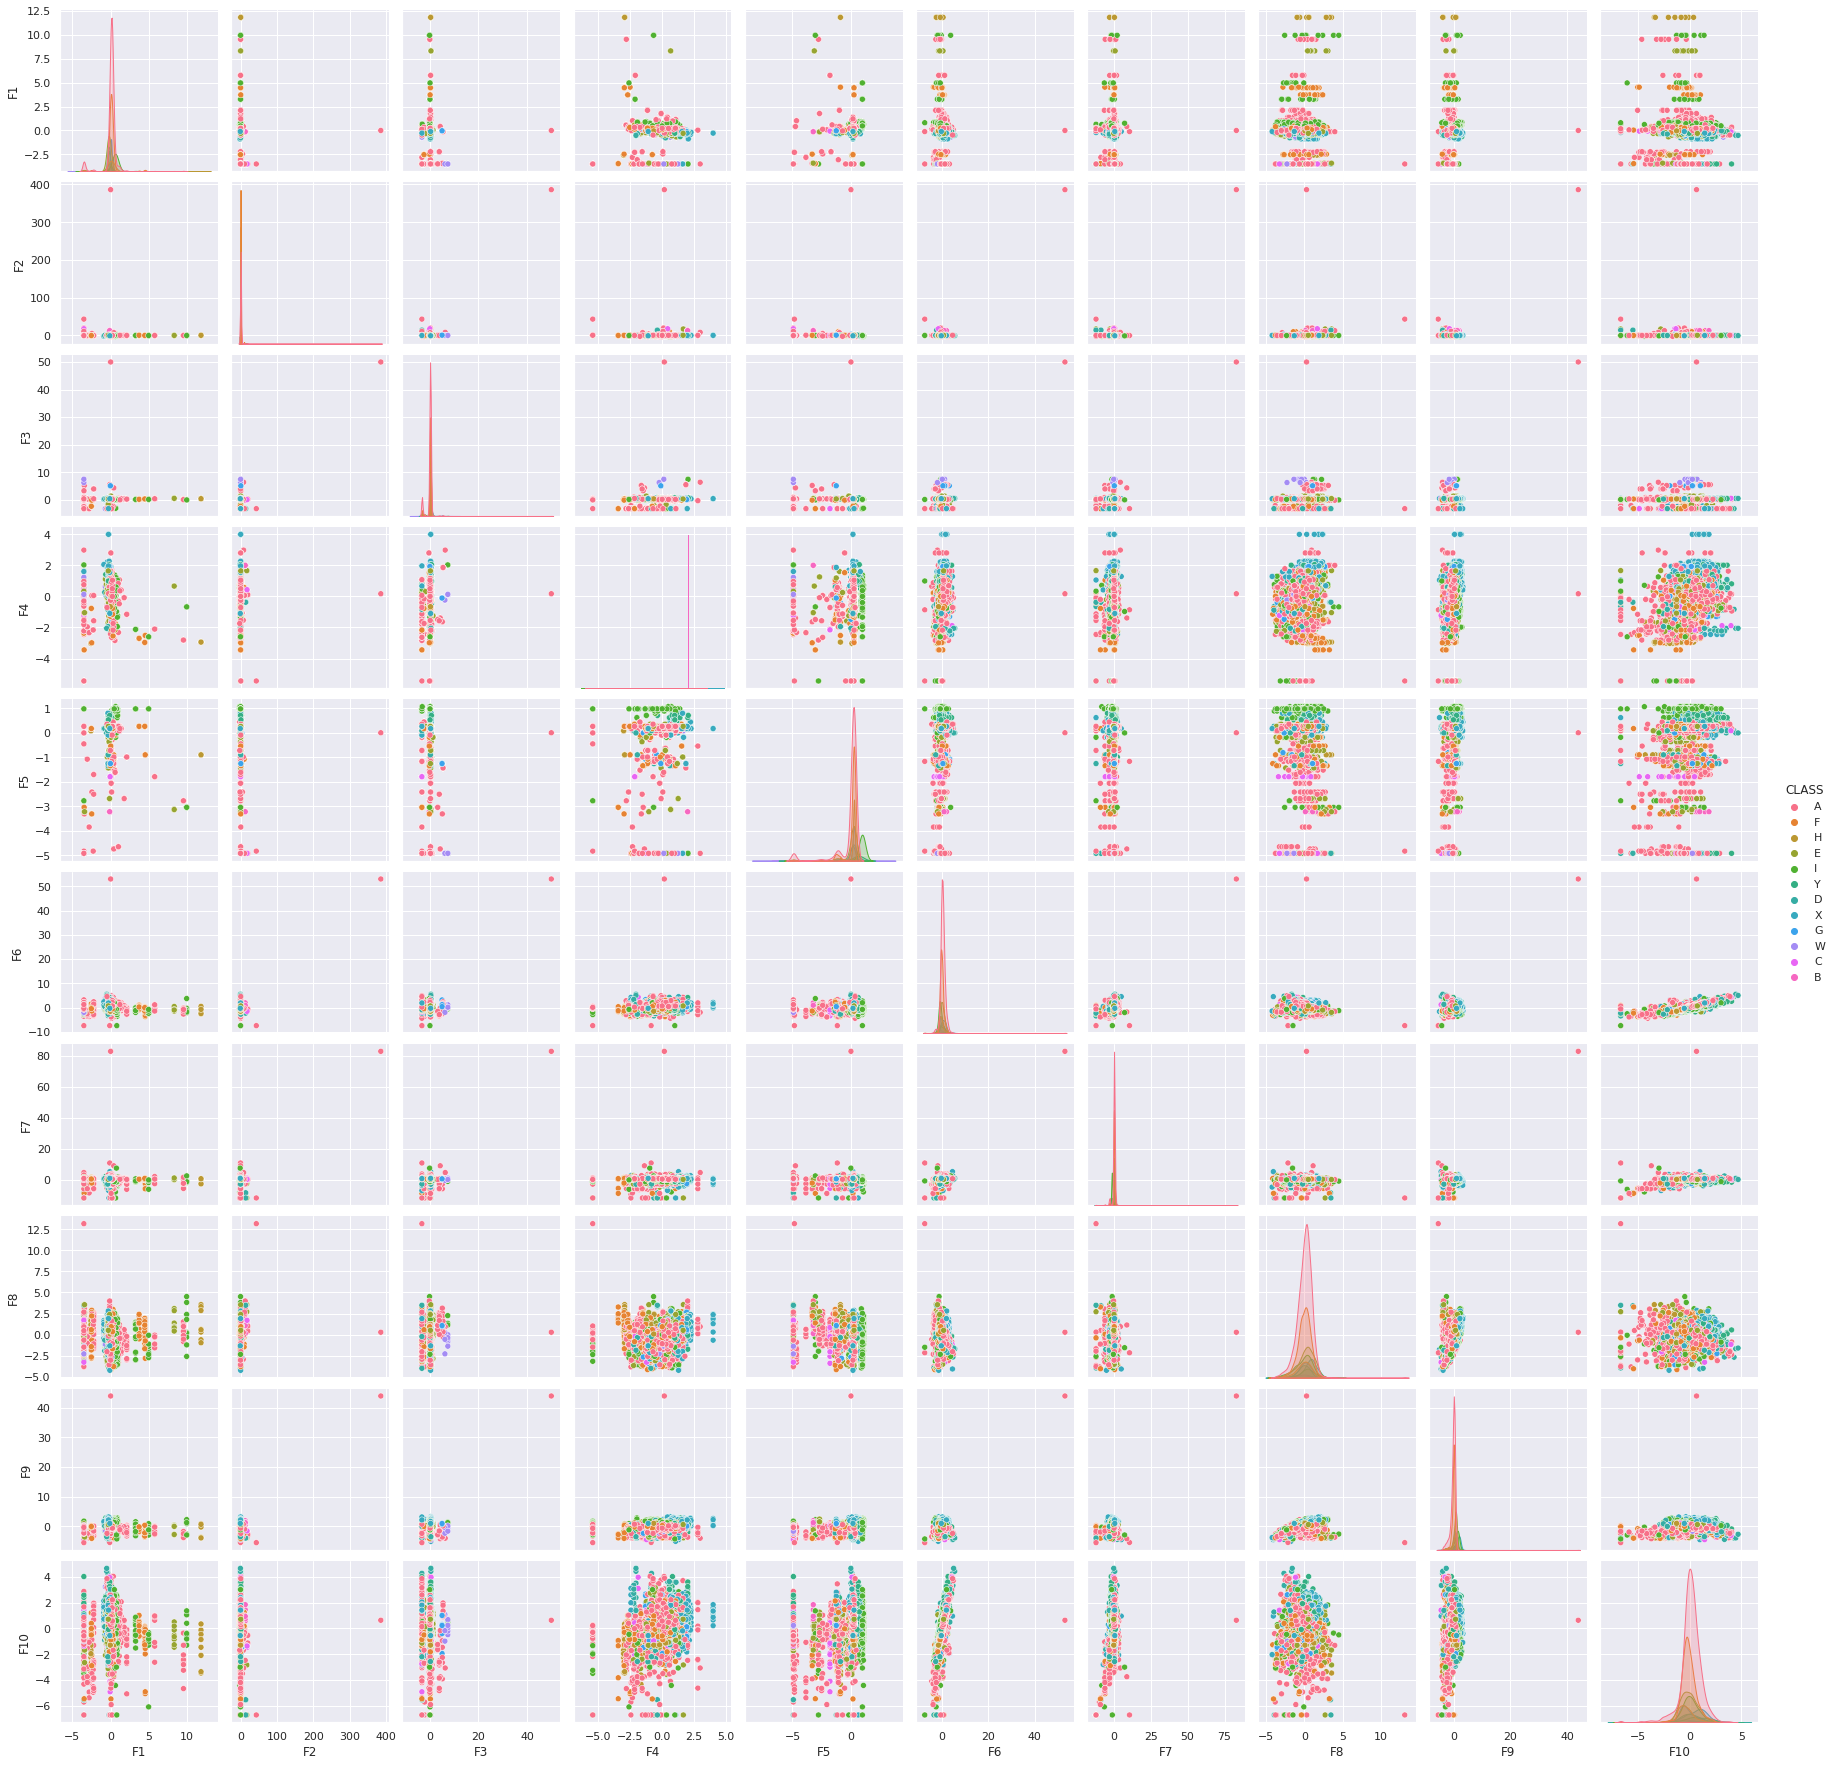

In [ ]:
with sns.plotting_context('notebook'):
  sns.set()
  sns.pairplot(df_tr, hue='CLASS')

* Utilizamos o boxplot para visualizar a distribuição e verificar possíveis *outliers*.

<AxesSubplot:>

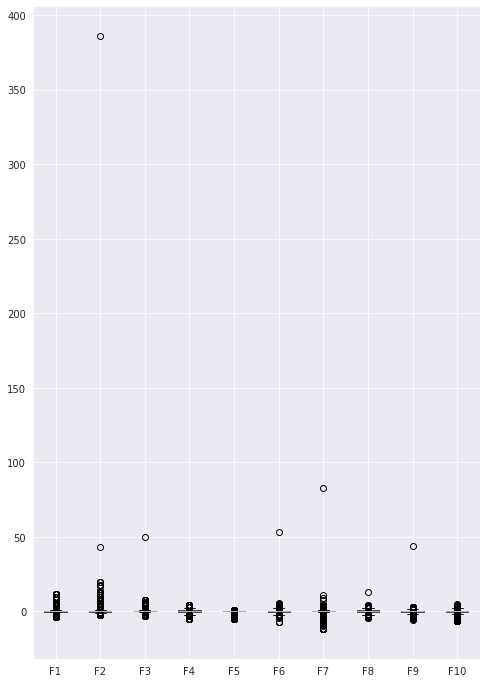

In [ ]:
df_tr.boxplot(column=['F1', 'F2', 'F3', 'F4', 'F5', 'F6','F7', 'F8', 'F9', 'F10'], figsize=(8,12))

Tanto com o *PairPlot* quanto com o *Boxplot* conseguimos visualizar possíveis outliers nas variáveis. Como no caso da variável **F2**.

Com o *PairPlot* conseguimos visualizar o nível de correlação de algumas variáveis, como no caso da variável **F10** e **F6** vemos que essas variáveis são correlacionadas positivamente. Além disso conseguimos ter uma ideia de quão bem uma única variável consegue separar as classes alvos através da diagonal principal do plot.

# Dividindo a Base de Treino em Treino e Validação

* Vamos utilizar 20% da base de treino original para ser o conjunto de validação e os 80% restante para o novo conjunto de treino mantendo as proporções das classes da base de treino original.

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(df_tr.iloc[:, :-1], df_tr.iloc[:, -1], test_size=0.2, random_state = 10, stratify=df_tr.iloc[:, -1])


# Pré-Processamento

Analisamos que não possuímos features categóricas logo não é necessário realizar um enconder.

 Também não temos dados faltantes nas bases, logo não é necessário realizar uma imputação dos dados.

* Standardization

Ao analisar a distribuição das variáveis de treino verificamos que algumas variáveis não possuem média 0 e desvio padrão 1 apesar da *Z-normalization* aplicada pelos autores da base. Inferimos que isso foi causado pela divisão da base, uma vez que a normalização foi aplicada na base completa. Para contornar isso, decidimos normalizar a base novamente.

> Decidimos utilizar o RobustScaler pois ele utiliza a mediana em vez da média para realizar a padronização dos dados, como utilizado pelo *Z-normalization* sendo assim mais robusto aos *outliers*. A padronização é realizada subtraindo o valor pela mediana e dividindo o resultado pela diferença entre o 75º quantil e o 25º quantil, como mostrado na fórmula abaixo:<br>
$X = \frac{x_i - x_{mediana}}{x_{75} - x_{25}}$

In [ ]:
scaler_knn  = RobustScaler()
scaler_nb  = RobustScaler()
scaler_lr  = RobustScaler()
scaler_tree  = RobustScaler()

# Treinamento

* Declarando os modelos
> Declaramos quatro modelos para realizar o treinamento e análise com os dados, sendo eles: *K Nearest Neighbor*, *Naive Bayes*, *Logistic Regression* e *Decision Tree*.

In [ ]:
KNN = KNeighborsClassifier(p=2)
NB = GaussianNB()
LR = LogisticRegression(max_iter=1000)
Tree = DecisionTreeClassifier()

* Definindo a função para plotar a matriz de confusão

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

def Report(name, predictions, labels):
    cf_matrix = confusion_matrix(labels, predictions)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='magma', xticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y'],
                     yticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y'])
    ax.set_title(f'Confusion Matrix {name}\n')
    ax.set_xlabel('Predictions')
    ax.set_ylabel('Labels')
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.savefig(name + ".png")
    plt.show()
    print(classification_report(labels, predictions))

* Definindo a função para analisar os modelos gerando um *report* com as métricas: *precision*, *recall*, *f1-score* e *accuracy*.

In [ ]:
def test_model (model, x_valid, y_valid):
  preds = model.predict(x_valid)
  return classification_report(preds, y_valid)

* Conectando o pré-processamento com o modelo através do Pipeline.

In [ ]:
pipe_knn = Pipeline(steps=[
    ('scaler', scaler_knn),
    ('knn', KNN)
])

pipe_nb = Pipeline(steps=[
    ('scaler', scaler_nb),
    ('nb', NB)
])

pipe_lr = Pipeline(steps=[
    ('scaler', scaler_lr),
    ('lr', LR)
])

pipe_tree = Pipeline(steps=[
    ('scaler', scaler_tree),
    ('tree', Tree)
])

## Utilizando Hiperparâmetros padrões

>Primeiro treinamos os modelos com os hiperparâmetros padrões para termos um *baseline* de comparação com as futuras melhorias nos modelos.

* Cross Validation

> Utilizamos o Cross Validation com o conjunto de treino para termos resultados mais fidedignos. Para tanto, utilizamos o K Fold Estratificado para manter a distribuição de classes alvos na separação dos folds.

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
results = cross_validate(pipe_knn, X=x_train, y=y_train, cv=kfold, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])
print("Average precision: %f (%f)" %(results['test_precision_macro'].mean(), results['test_precision_macro'].std()))
print("Average recall: %f (%f)" %(results['test_recall_macro'].mean(), results['test_recall_macro'].std()))
print("Average f1-score: %f (%f)" %(results['test_f1_macro'].mean(), results['test_f1_macro'].std()))
print("Average accuracy: %f (%f)" %(results['test_accuracy'].mean(), results['test_accuracy'].std()))

Average precision: 0.843951 (0.039310)
Average recall: 0.776503 (0.042320)
Average f1-score: 0.801923 (0.036729)
Average accuracy: 0.825142 (0.008664)


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
results = cross_validate(pipe_nb, X=x_train, y=y_train, cv=kfold, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])
print("Average precision: %f (%f)" %(results['test_precision_macro'].mean(), results['test_precision_macro'].std()))
print("Average recall: %f (%f)" %(results['test_recall_macro'].mean(), results['test_recall_macro'].std()))
print("Average f1-score: %f (%f)" %(results['test_f1_macro'].mean(), results['test_f1_macro'].std()))
print("Average accuracy: %f (%f)" %(results['test_accuracy'].mean(), results['test_accuracy'].std()))

Average precision: 0.368469 (0.013381)
Average recall: 0.455413 (0.024343)
Average f1-score: 0.355641 (0.017897)
Average accuracy: 0.306690 (0.023662)


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
results = cross_validate(pipe_lr, X=x_train, y=y_train, cv=kfold, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])
print("Average precision: %f (%f)" %(results['test_precision_macro'].mean(), results['test_precision_macro'].std()))
print("Average recall: %f (%f)" %(results['test_recall_macro'].mean(), results['test_recall_macro'].std()))
print("Average f1-score: %f (%f)" %(results['test_f1_macro'].mean(), results['test_f1_macro'].std()))
print("Average accuracy: %f (%f)" %(results['test_accuracy'].mean(), results['test_accuracy'].std()))

Average precision: 0.461227 (0.023740)
Average recall: 0.390985 (0.015685)
Average f1-score: 0.396923 (0.016273)
Average accuracy: 0.565196 (0.007598)


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
results = cross_validate(pipe_tree, X=x_train, y=y_train, cv=kfold, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'], )
print("Average precision: %f (%f)" %(results['test_precision_macro'].mean(), results['test_precision_macro'].std()))
print("Average recall: %f (%f)" %(results['test_recall_macro'].mean(), results['test_recall_macro'].std()))
print("Average f1-score: %f (%f)" %(results['test_f1_macro'].mean(), results['test_f1_macro'].std()))
print("Average accuracy: %f (%f)" %(results['test_accuracy'].mean(), results['test_accuracy'].std()))

Average precision: 0.904252 (0.031071)
Average recall: 0.896720 (0.026768)
Average f1-score: 0.899264 (0.029052)
Average accuracy: 0.937678 (0.019316)


* Treinando os modelos e verificando performance na base de validação

In [ ]:
_ = pipe_knn.fit(x_train, y_train)
_ = pipe_nb.fit(x_train, y_train)
_ = pipe_lr.fit(x_train, y_train)
_ = pipe_tree.fit(x_train, y_train)

In [ ]:
print(f'O modelo KNN obteve o seguinte resultado: \n {test_model(pipe_knn, x_valid, y_valid)} --------------------------------------------------------\n')
print(f'O modelo Naive Bayes obteve o seguinte resultado: \n {test_model(pipe_nb, x_valid, y_valid)} --------------------------------------------------------\n')
print(f'O modelo Logistic Regression obteve o seguinte resultado: \n {test_model(pipe_lr, x_valid, y_valid)} --------------------------------------------------------\n')
print(f'O modelo Decision Tree obteve o seguinte resultado: \n {test_model( pipe_tree, x_valid, y_valid)}')

O modelo KNN obteve o seguinte resultado: 
               precision    recall  f1-score   support

           A       0.90      0.82      0.86       941
           B       1.00      1.00      1.00         1
           C       0.52      0.85      0.65        13
           D       0.79      0.89      0.83        62
           E       0.73      0.88      0.80       180
           F       0.79      0.74      0.77       420
           G       0.66      0.82      0.73        72
           H       0.63      0.87      0.73        76
           I       0.98      1.00      0.99       163
           W       0.89      0.89      0.89         9
           X       0.86      0.98      0.91        92
           Y       0.94      0.88      0.91        57

    accuracy                           0.84      2086
   macro avg       0.81      0.88      0.84      2086
weighted avg       0.85      0.84      0.84      2086
 --------------------------------------------------------

O modelo Naive Bayes obteve o s

> Já no *base line* temos resultados bem positivos, como no caso do *Decision Tree* e do *KNN*.

## Fazendo a Busca dos Hiperparâmetro

Para realizar a busca dos hiperparâmetros três técnicas foram utilizadas.

1. Para buscar o hiperparâmetro K do KNN foi criado uma função na qual é testado um intervalo de valores para o K. Para cada modelo utilizamos a distância euclidiana para o cálculo das distância e consideramos os K vizinhos para a predição. É verificado a performance na base de treino e de validação, e selecionamos o valor de K que maximiza a acurácia no conjunto de validação contanto que a acurácia de treino seja maior que a de validação, tal condição é feita para garantir um resultado com maior fidelidade e que possa se reproduzir com outros dados.

2. Para a busca dos outros hiperparâmetros do KNN utilizamos o *GridSearchCV*. O método realiza uma busca por força bruta, utilizando todas as combinações dos hiperparâmetros passadas ao método, e realiza a análise de performance através do *Cross Validation*, o qual foi utilizado o método *KFold* estratificado com 5 *folds*.

3. Para a busca dos hiperparâmetros do *Naive Bayes*, *Logistic Regression* e *Decision Tree* utilizamos o *BayesSearchCV* para realizar a busca. O método, em contraste com o *GridSearchCV*, não realiza uma busca por força bruta, ou seja nem todos os parâmetros são testados e sim um número fixo de configurações de hiperparâmetros são amostrados das suas distribuições especificadas. Assim, por exemplo, podemos definir um intervalo de valores reais para um hiperparâmetro e utilizar uma distribuição uniforme para selecionar um valor para esse hiperparametro e avaliar a perfomance através do *Cross Validation* e realizar esse processo pelo número de iterações informadas ao método. Foi utilizado também o método *KFold* estratificado com 5 *folds* para ser utilizado no *Cross Validation*.

### Buscando Hiperparametro K para o KNN utilizando distância euclidiana

Utilizamos a métrica Acurácia para verificar a performance no conjunto de validação, e escolhemos o valor de K que maximiza o valor da acurácia no conjunto de validação e a acurácia de treino seja maior que a de validação. A segunda condição nos garante maior fidelidade que o resultado que obtivemos possa se reproduzir em dados futuros.

In [ ]:
def search_k_knn(k_values, x_train_, y_train_, x_valid_, y_valid_, scalar):
  best_k = None
  best_accuracy = 0
  best_accuracy_train = 0

  scalar = scalar.fit(x_train_)
  x_train_ = scalar.transform(x_train_)
  x_valid_ = scalar.transform(x_valid_)
  for k in k_values:
    knn_t = KNeighborsClassifier(n_neighbors = k, p=2)
    knn_t.fit(x_train_, y_train_)
    train_accuracy = knn_t.score(x_train_, y_train_)
    valid_accuracy = knn_t.score(x_valid_, y_valid_)
    if valid_accuracy > best_accuracy and train_accuracy > valid_accuracy:
      best_accuracy = valid_accuracy
      best_accuracy_train = train_accuracy
      best_k = k

  print('Melhor Valor de K:', best_k)
  print('Acurácia obtida no conjunto de validação:', best_accuracy)
  print('Acurácia obtida no conjunto de treino:', best_accuracy_train)

  return best_k

In [ ]:
best_k = search_k_knn(range(2, 31), x_train, y_train, x_valid, y_valid, RobustScaler())

Melhor Valor de K: 3
Acurácia obtida no conjunto de validação: 0.8509108341323106
Acurácia obtida no conjunto de treino: 0.9356423777564717


> Realizando o treinamento no conjunto de treinamento e validando a performance no conjunto de validação obtivemos **3** como o melhor valor de K.

### Realizando Busca dos Hiperparâmetros Restantes do KNN

Após realizar a busca do melhor valor de K no conjunto de validação, vamos fixar esse valor e utilizar a distância euclidiana para buscar o melhor valor para o hiperparâmetro *weights*, que se refere a função de peso utilizada na predição, buscamos entre os 2 valores:

* *uniform*: Pesos uniformes. Todos os pontos em cada vizinhança têm o mesmo peso.
* *distance*: Os pontos são ponderados pelo inverso de suas distâncias. Assim, vizinhos mais próximos de um ponto de consulta terão maior influência do que vizinhos mais longes.

Para realizar a busca dos hiperparâmetros foi utilizado o *GridSearchCV*, o qual realiza uma busca por força bruta, combinando cada um dos hiperparâmetros passados e avaliando a performance através do Cross Validation, sendo o *KFold* estratificado a opção escolhida.

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
opt_knn = GridSearchCV(
    pipe_knn,
    {
        'knn__n_neighbors': [best_k],
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [2]
    },
    cv=kfold
)
_ = opt_knn.fit(x_train, y_train)

In [ ]:
print("Melhores Parâmetros obtidos: %s" % str(opt_knn.best_params_))
print(f'O modelo KNN obteve o seguinte resultado: \n {test_model(opt_knn, x_valid, y_valid)} --------------------------------------------------------\n')

Melhores Parâmetros obtidos: {'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance'}
O modelo KNN obteve o seguinte resultado: 
               precision    recall  f1-score   support

           A       0.88      0.87      0.88       867
           B       1.00      1.00      1.00         1
           C       0.76      0.94      0.84        17
           D       0.89      0.91      0.90        68
           E       0.80      0.91      0.85       192
           F       0.83      0.74      0.78       438
           G       0.73      0.79      0.76        82
           H       0.75      0.85      0.80        92
           I       1.00      1.00      1.00       166
           W       1.00      0.90      0.95        10
           X       0.88      0.95      0.91        97
           Y       0.94      0.89      0.92        56

    accuracy                           0.86      2086
   macro avg       0.87      0.90      0.88      2086
weighted avg       0.86      0.86      0.86      2

### Realizando a Busca dos Hiperparâmetros do *Naive Bayes*

Para realizar a busca dos hiperparâmetros do *Naive Bayes* utilizamos o *BayesSearchCV* para buscar o hiperparâmetro:
* **var_smoothing**: Porção da maior variância entre todas as variáveis que é adicionada para a estabilidade do cálculo.

Utilizamos o *KFold* estratificado para realizar o *Cross Validation* e definimos 50 iterações para busca.

Definimos um intervalo entre 1e-9 e 1e-3 para realizar a busca do melhor valor para o *var_smoothing*, como se trata de valores distantes e pequenos, utilizamos a distribuição *log uniform* com base 10 para ser amostrada. Utilizando essa distribuição os pontos são amostrados uniformimente entre log(1e-9, 10) e log(1e-3, 10), e após a seleção aleatória de um valor nessa faixa, é realizado a exponencial na base 10 desse valor para se obter o valor a ser utilizado no hiperparâmetro.

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
opt_nb = BayesSearchCV(
    pipe_nb,
    {
        'nb__var_smoothing': Real(1e-9, 1e-3, prior='log-uniform'),
    },
    n_iter = 50,
    cv=kfold,
    random_state=10
)
_ = opt_nb.fit(x_train, y_train)

In [ ]:
print("Melhores Parâmetros: %s" % str(opt_nb.best_params_))
print(f'O modelo NB obteve o seguinte resultado: \n {test_model(opt_nb, x_valid, y_valid)} --------------------------------------------------------\n')

Melhores Parâmetros: OrderedDict([('nb__var_smoothing', 1.95480202604177e-09)])
O modelo NB obteve o seguinte resultado: 
               precision    recall  f1-score   support

           A       0.06      0.44      0.10       117
           B       1.00      1.00      1.00         1
           C       0.05      0.03      0.03        39
           D       0.23      0.14      0.17       114
           E       0.10      0.24      0.14        86
           F       0.39      0.26      0.31       585
           G       0.75      0.16      0.27       412
           H       0.79      0.23      0.35       364
           I       0.61      0.74      0.67       137
           W       0.67      0.17      0.27        35
           X       0.65      0.49      0.56       139
           Y       0.45      0.42      0.44        57

    accuracy                           0.28      2086
   macro avg       0.48      0.36      0.36      2086
weighted avg       0.52      0.28      0.32      2086
 ----------

### Realizando a Busca dos Hiperparâmetros do *Logistic Regression*

Para realizar a busca dos hiperparâmetros do *Logistic Regression* utilizamos o *BayesSearchCV* para buscar os hiperparâmetros:
* **penalty**: Indica qual regularização utilizar.
  * l2
* **solver**: Algoritmo utilizado para o otimização.
  * newton-cg
  * sag
  * saga
  * lbfgs
  * liblinear
* **C**: Inverso da força de regularização. Quanto menor o valor mais forte é a regularização

Utilizamos o *BayesSearchCV* com o *KFold* estratificado e definimos 50 iterações para busca.

Fixamos o valor de *penalty* para *l2* pois é o único valor que tem compatibilidade com todos os solver disponíveis.

Para o hiperparâmetro *solver* definimos os possíveis valores como categorias, tendo cada uma a mesma probabilidade de ser escolhida.

Para o hiperparâmetro *C* definimos um intervalo de 1e-4 a 2 e utilizamos a distribuição *log-uniform* com base 10 para realizar as amostragens. Utilizando essa distribuição os pontos são amostrados uniformimente entre log(1e-4, 10) e log(2, 10), e após a seleção aleatória de um valor nessa faixa, é realizado a exponencial na base 10 desse valor para se obter o valor a ser utilizado no hiperparâmetro.

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
opt_lr = BayesSearchCV(
    pipe_lr,
    {
        'lr__penalty': Categorical(['l2']),
        'lr__solver': Categorical(['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear']),
        'lr__C': Real(1e-4, 2, prior='log-uniform')
    },
    n_iter = 50,
    cv = kfold,
    random_state=10
)
_ = opt_lr.fit(x_train, y_train)

In [ ]:
print("Melhores Parâmetros: %s" % str(opt_lr.best_params_))
print(f'O modelo LR obteve o seguinte resultado: \n {test_model(opt_lr, x_valid, y_valid)} --------------------------------------------------------\n')

Melhores Parâmetros: OrderedDict([('lr__C', 0.7616055520040405), ('lr__penalty', 'l2'), ('lr__solver', 'lbfgs')])
O modelo LR obteve o seguinte resultado: 
               precision    recall  f1-score   support

           A       0.93      0.53      0.68      1503
           B       1.00      1.00      1.00         1
           C       0.00      0.00      0.00         1
           D       0.00      0.00      0.00         0
           E       0.24      0.50      0.33       107
           F       0.09      0.32      0.14       109
           G       0.00      0.00      0.00         0
           H       0.17      0.36      0.23        50
           I       0.89      0.87      0.88       169
           W       0.00      0.00      0.00         0
           X       0.67      0.74      0.70        95
           Y       0.60      0.63      0.62        51

    accuracy                           0.55      2086
   macro avg       0.38      0.41      0.38      2086
weighted avg       0.81      0.

### Realizando a Busca dos Hiperparâmetros do *Decision Tree*

Para realizar a busca dos hiperparâmetros do *Decision Tree* utilizamos o *BayesSearchCV* para buscar os hiperparâmetros:
* **max_depth**: A maior profundidade da árvore.
* **criterion**: Define a função para medir a qualidade de uma divisão na árvore.
  * gini
  * entropy
* **min_samples_split**: Número mínimo de amostras de treino necessárias para dividir um nó interno.
* **min_samples_leaf**: Número mínimo de amostras de treino necessárias para ser um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos *min_samples_leaf* amostras de treinamento  em cada um dos ramos esquerdo e direito.

Utilizamos o *BayesSearchCV* com o *KFold* estratificado e definimos 50 iterações para busca.

Para o hiperparâmetro *max_depth* definimos um intervalo entre 10 e 40 e utilizamos uma distribuição uniforme para realizar a amostragem de valores nesse intervalo.

Para o hiperparâmetro *criterion* definimos duas categorias possíveis, ambas com a mesma probabilidade de serem escolhidas.

Para os hiperparâmetros *min_samples_leaf* e *min_samples_split* definimos um intervalo entre 10 e 20 utilizando a distribuição uniforme para realizar a amostragem de valores nesse intervalo.



In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
opt_tree = BayesSearchCV(
    pipe_tree,
    {
        'tree__max_depth': Integer(10, 40),
        'tree__criterion': Categorical(['gini', 'entropy']),
        'tree__min_samples_leaf': Integer(1, 20),
        'tree__min_samples_split': Integer(1, 20)
    },
    n_iter = 50,
    cv = kfold,
    random_state=10
)
_ = opt_tree.fit(x_train, y_train)

In [ ]:
print("Melhores Parâmetros: %s" % str(opt_tree.best_params_))
print(f'O modelo Decision Tree obteve o seguinte resultado: \n {test_model(opt_tree, x_valid, y_valid)} --------------------------------------------------------\n')

Melhores Parâmetros: OrderedDict([('tree__criterion', 'entropy'), ('tree__max_depth', 30), ('tree__min_samples_leaf', 1), ('tree__min_samples_split', 1)])
O modelo Decision Tree obteve o seguinte resultado: 
               precision    recall  f1-score   support

           A       0.99      0.98      0.99       860
           B       1.00      1.00      1.00         1
           C       0.90      1.00      0.95        19
           D       0.97      0.99      0.98        69
           E       0.95      0.98      0.97       214
           F       0.99      0.99      0.99       394
           G       0.97      0.99      0.98        87
           H       0.97      0.94      0.95       108
           I       0.99      0.99      0.99       165
           W       1.00      0.90      0.95        10
           X       0.98      0.97      0.98       106
           Y       0.98      0.98      0.98        53

    accuracy                           0.98      2086
   macro avg       0.97      0.98

# Avaliando Desempenho na Base de Teste

Após a selecionar os melhores hiperparâmetros para modelo, treinar e validar os modelos nos datasets de treino e validação, aplicamos a melhor configuração de cada modelo no dataset de teste.

## Métricas de avaliação

Para avaliar o desempenho utilizamos as métricas: *precision*, *recall*, *f1-score* e *accuracy*. Adicionalmente montamos a matriz de confusão para cada modelo.

## KNN
Foi o modelo que obteve um ótimo rendimento, com todas métricas acima de 0.87, o segundo melhor desempenho dos modelos testados. Obteve seu melhor rendimento na métrica precision (0.91).

Através da análise da matriz de confusão é possível perceber que diagonal principal concentra a maior parte dos registros, comprovando que o modelo classifica a maioria dos registro de forma correta.

É possivel ver atráves do report o desempenho do modelo em cada uma das classes, é perceptível que o desempenho é muito bom para todas as classe e se destacam as classe B e I onde o valor das métricas são maiores ou iguais a 0.99

Seu desempenho foi:
  - Precision: 0.91
  - Recall: 0.87
  - F1-score: 0.89
  - Accuracy: 0.87

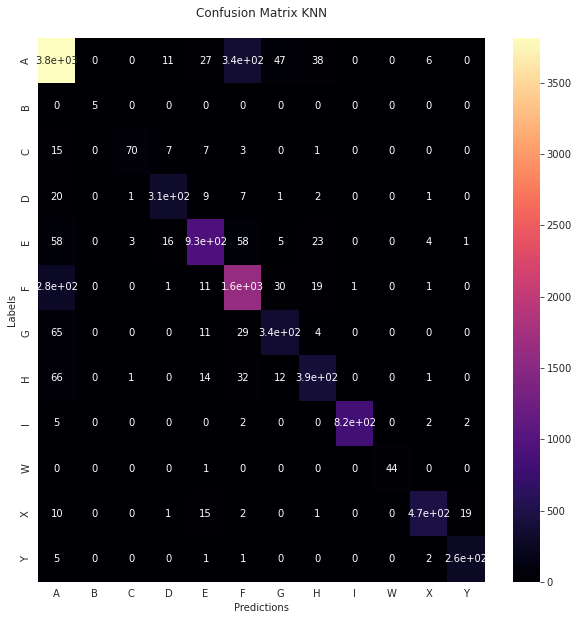

              precision    recall  f1-score   support

           A       0.88      0.89      0.88      4286
           B       1.00      1.00      1.00         5
           C       0.93      0.68      0.79       103
           D       0.90      0.88      0.89       353
           E       0.91      0.85      0.88      1095
           F       0.77      0.83      0.80      1962
           G       0.78      0.76      0.77       447
           H       0.82      0.76      0.79       520
           I       1.00      0.99      0.99       832
           W       1.00      0.98      0.99        45
           X       0.97      0.91      0.94       522
           Y       0.92      0.97      0.94       267

    accuracy                           0.87     10437
   macro avg       0.91      0.87      0.89     10437
weighted avg       0.87      0.87      0.87     10437



In [ ]:
Report('KNN', opt_knn.predict(x_test), y_test)

## Naive Bayes
Foi o modelo que obteve um rendimento insatisfatório, com todas métricas abaixo de 0.47, o pior desempenho dos modelos testados, provavelmente o modelo não se adequa a esse problema. Obteve seu melhor rendimento na métrica recall (0.47).

Através da análise da matriz de confusão é possível perceber que a maioria dos registros estão na primeira linha e não na diagonal principal, que seria o resultado esperado. Assim, é possível observar que modelo não conseguiu aprender o problema.

É possivel ver atráves do report o desempenho do modelo em cada uma das classes, é perceptível que o modelo, com exceção da classe B, não conseguiu aprender nenhuma classe bem, tendo como pior classe a C com todas as métricas inferiores a 0.07.

Seu desempenho foi:
  - Precision: 0.37
  - Recall: 0.47
  - F1-score: 0.36
  - Accuracy: 0.30

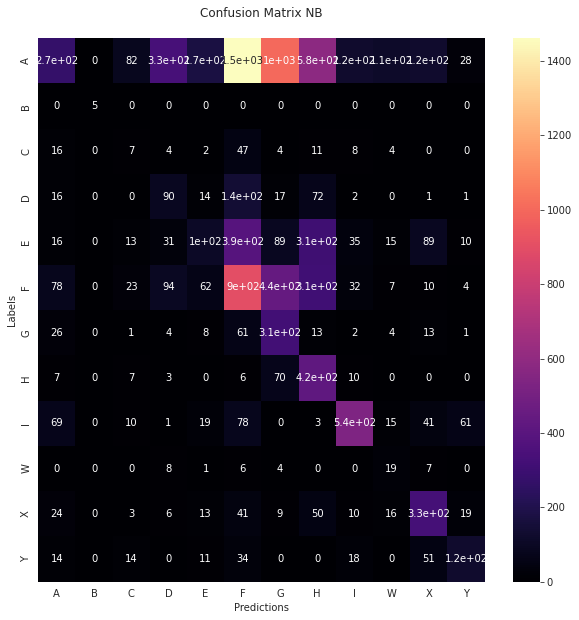

              precision    recall  f1-score   support

           A       0.50      0.06      0.11      4286
           B       1.00      1.00      1.00         5
           C       0.04      0.07      0.05       103
           D       0.16      0.25      0.19       353
           E       0.25      0.09      0.14      1095
           F       0.28      0.46      0.35      1962
           G       0.16      0.70      0.26       447
           H       0.24      0.80      0.36       520
           I       0.69      0.64      0.67       832
           W       0.10      0.42      0.16        45
           X       0.50      0.63      0.56       522
           Y       0.50      0.47      0.48       267

    accuracy                           0.30     10437
   macro avg       0.37      0.47      0.36     10437
weighted avg       0.40      0.30      0.26     10437



In [ ]:
Report('NB', opt_nb.predict(x_test), y_test)

## Logistic Regression
Foi o modelo que obteve um rendimento insatisfatório, com todas métricas abaixo de 0.56, o segundo pior desempenho dos modelos testados, é possível que o algoritmo seja muito simples para problema. Obteve seu melhor rendimento na métrica accuracy (0.56).

Através da análise da matriz de confusão é possível perceber que diagonal principal apresenta "falhas" com valores iguais a zero e outros valores altos, o que demontra que o modelo aprendeu bem algumas classes e não conseguiu aprender outras.

É possivel ver atráves do report o desempenho do modelo em cada uma das classes, é perceptível que o desempenho varia bastante, apresenta desempenho perfeito para classe B, no entanto, não classifica corretamento nenhum registro das classes C, D e G

Seu desempenho foi:
  - Precision: 0.46
  - Recall: 0.40
  - F1-score: 0.40
  - Accuracy: 0.56

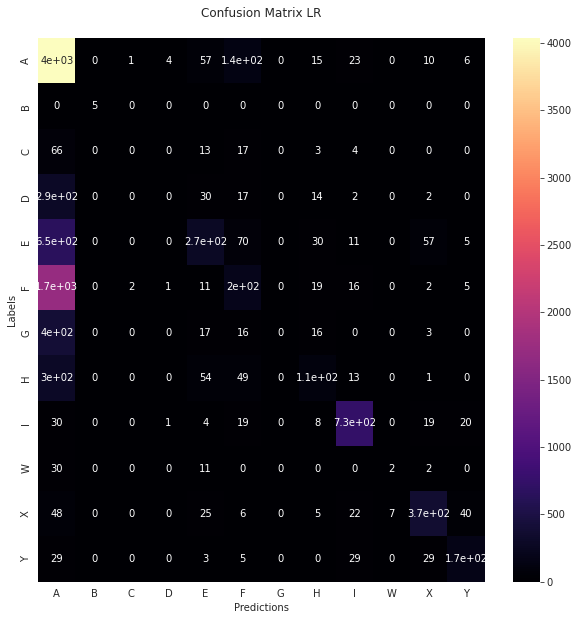

              precision    recall  f1-score   support

           A       0.53      0.94      0.68      4286
           B       1.00      1.00      1.00         5
           C       0.00      0.00      0.00       103
           D       0.00      0.00      0.00       353
           E       0.55      0.25      0.34      1095
           F       0.38      0.10      0.16      1962
           G       0.00      0.00      0.00       447
           H       0.49      0.20      0.29       520
           I       0.86      0.88      0.87       832
           W       0.22      0.04      0.07        45
           X       0.75      0.71      0.73       522
           Y       0.69      0.64      0.67       267

    accuracy                           0.56     10437
   macro avg       0.46      0.40      0.40     10437
weighted avg       0.50      0.56      0.48     10437



In [ ]:
Report('LR', opt_lr.predict(x_test), y_test)

## Decision Tree
Foi o modelo que obteve um excelente rendimento, com todas métricas acima de 0.97, o melhor desempenho dos modelos testados. Obteve seu melhor rendimento na métrica *accuracy* (0.98).

Através da análise da matriz de confusão é possível perceber que diagonal principal é densamente povoado, comprovando que o modelo classifica a imensa maioria dos registro de forma correta.

É possivel ver atráves do report o desempenho do modelo em cada uma das classes, é perceptível que o desempenho é muito bom para todas as classe e se destacam as classe A e I onde o valor das métricas são maiores ou iguais a 0.99

Seu desempenho foi:
  - Precision: 0.97
  - Recall: 0.97
  - F1-score: 0.97
  - Accuracy: 0.98

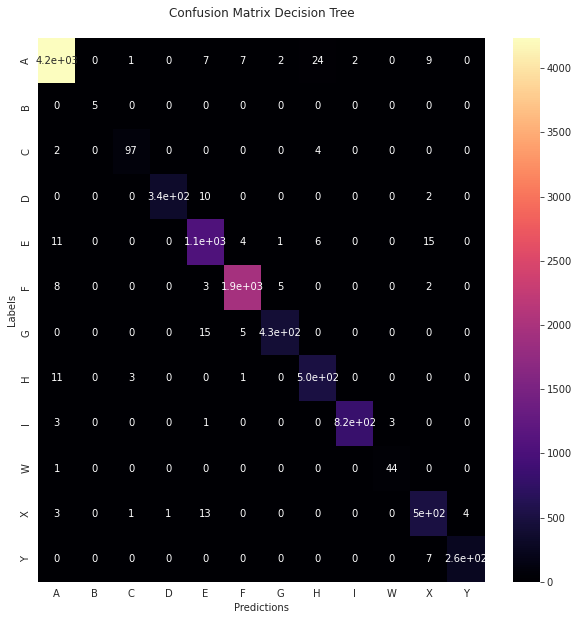

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      4286
           B       1.00      1.00      1.00         5
           C       0.95      0.94      0.95       103
           D       1.00      0.97      0.98       353
           E       0.96      0.97      0.96      1095
           F       0.99      0.99      0.99      1962
           G       0.98      0.96      0.97       447
           H       0.94      0.97      0.95       520
           I       1.00      0.99      0.99       832
           W       0.94      0.98      0.96        45
           X       0.93      0.96      0.95       522
           Y       0.98      0.97      0.98       267

    accuracy                           0.98     10437
   macro avg       0.97      0.97      0.97     10437
weighted avg       0.98      0.98      0.98     10437



In [ ]:
Report('Decision Tree', opt_tree.predict(x_test), y_test)